#Bibliotecas

In [53]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import random
import mlxtend
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
from wordcloud import WordCloud


##Avaliadas

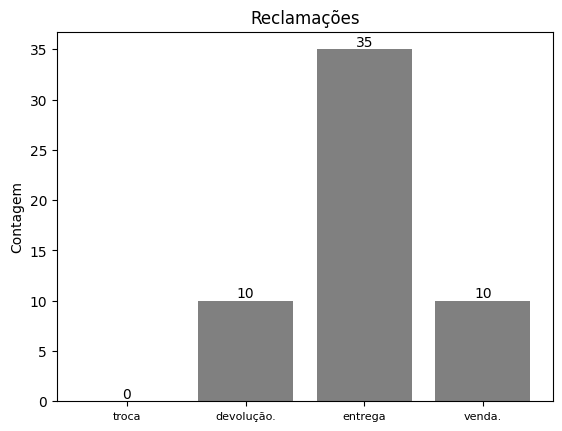

In [51]:
# Motivo das reclamações

colunas = list(palavras_chave.keys())
contagem = [df[f'count_{coluna}'].sum() for coluna in colunas]

titulo = 'Reclamações'
cor_barras = '#808080'

plt.bar(colunas, contagem, color=cor_barras)

for i, v in enumerate(contagem):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.ylabel('Contagem')
plt.title(titulo)

plt.xticks(fontsize=8)

plt.show()

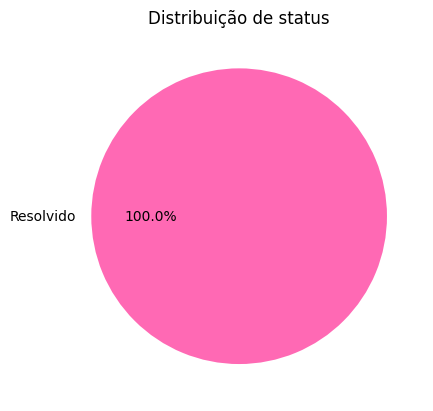

In [50]:
#Distribuição de status

contagem=pd.Series(status_totais).value_counts()
contagem.plot.pie(autopct='%1.1f%%', colors=['#FF69B4', '#808080'])
plt.title ('Distribuição de status')
plt.show()

###Arquivo

####Raspagem


In [33]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3',
    'Referer': 'http://www.example.com',
    'Accept-Language': 'en-US,en;q=0.9',
}

dafitiavaliadas_url = "https://www.reclameaqui.com.br/empresa/dafiti/lista-reclamacoes/?pagina={}&status=EVALUATED"


In [34]:
## Reclamações:

max_pages = 128 ## Todas as reclamações

titulos_totais = []

for page_num in range(1, max_pages+1):
    url = dafitiavaliadas_url.format(page_num)
    page = requests.get(url, headers=headers)
    if page.status_code == 200:
        bs = BeautifulSoup(page.text, 'html.parser')
        titulo = bs.find_all('h4', attrs={"class": "sc-1pe7b5t-1 jAlTVn"})
        titulo = [t.get_text() for t in titulo]
        titulos_totais.extend(titulo)
        print(f"Página {page_num}: Reclamações - {titulo}")
    else:
        print(f"Falha ao acessar a página {page_num}")

# Imprimir todos os títulos coletados
print(f"Todos os títulos: {titulos_totais}")

Página 1: Reclamações - ['Ainda  não fizeram o estorno do valor por cupom vale compras', 'Produto não entregue', 'TROCA DE UM PRODUTO', 'Não consigo acessar o site', 'Compra decepcionante', 'NÃO TENHO MAIS ACESSO AO E-MAIL CADASTRADO E PRECISO FAZER UMA DEVOLUÇÃO', 'Entrega não realizada no prazo .', 'Encomenda foi para outro estado', 'Produto devolvido indevidamente', 'DOIS PEDIDOS NÃO ENTREGUES']
Página 2: Reclamações - ['Produto não entregue', 'TROCA DE UM PRODUTO', 'Não consigo acessar o site', 'Compra decepcionante', 'NÃO TENHO MAIS ACESSO AO E-MAIL CADASTRADO E PRECISO FAZER UMA DEVOLUÇÃO', 'Entrega não realizada no prazo .', 'Encomenda foi para outro estado', 'Produto devolvido indevidamente', 'DOIS PEDIDOS NÃO ENTREGUES', 'Desrespeito com o cliente']
Página 3: Reclamações - ['TROCA DE UM PRODUTO', 'Não consigo acessar o site', 'Compra decepcionante', 'NÃO TENHO MAIS ACESSO AO E-MAIL CADASTRADO E PRECISO FAZER UMA DEVOLUÇÃO', 'Entrega não realizada no prazo .', 'Encomenda foi pa

In [35]:
## Status da reclamação:

max_pages = 128 ## Todos os status

status_totais = []

for page_num in range(1, max_pages+1):
    url = dafitiavaliadas_url.format(page_num)
    page = requests.get(url, headers=headers)
    if page.status_code == 200:
        bs = BeautifulSoup(page.text, 'html.parser')
        status = bs.find_all("span", attrs={"class": ["sc-1pe7b5t-4 bfIEOo", "sc-1pe7b5t-4 cdFULn", "sc-1pe7b5t-4 bfzjDQ", "sc-1pe7b5t-4 hZqQyt", "sc-1a60wwz-1 jlVOpm"] })
        status = [t.get_text() for t in status]
        status_totais.extend(status)
        print(f"Página {page_num}: status - {status}")
    else:
        print(f"Falha ao acessar a página {page_num}")

# Imprimir todas os status coletadas
print(f"Todos os status: {status_totais}")


Página 1: status - ['Resolvido', 'Resolvido', 'Resolvido', 'Resolvido', 'Resolvido', 'Resolvido', 'Resolvido', 'Resolvido', 'Resolvido', 'Resolvido']
Página 2: status - ['Resolvido', 'Resolvido', 'Resolvido', 'Resolvido', 'Resolvido', 'Resolvido', 'Resolvido', 'Resolvido', 'Resolvido', 'Resolvido']
Página 3: status - ['Resolvido', 'Resolvido', 'Resolvido', 'Resolvido', 'Resolvido', 'Resolvido', 'Resolvido', 'Resolvido', 'Resolvido', 'Resolvido']
Página 4: status - ['Resolvido', 'Resolvido', 'Resolvido', 'Resolvido', 'Resolvido', 'Resolvido', 'Resolvido', 'Resolvido', 'Resolvido', 'Resolvido']
Página 5: status - ['Resolvido', 'Resolvido', 'Resolvido', 'Resolvido', 'Resolvido', 'Resolvido', 'Resolvido', 'Resolvido', 'Resolvido', 'Resolvido']
Página 6: status - ['Resolvido', 'Resolvido', 'Resolvido', 'Resolvido', 'Resolvido', 'Resolvido', 'Resolvido', 'Resolvido', 'Resolvido', 'Resolvido']
Página 7: status - ['Resolvido', 'Resolvido', 'Resolvido', 'Resolvido', 'Resolvido', 'Resolvido', 'R

####Tratamento

In [36]:
#Total de dados coletados

print(len(titulos_totais))
print(len(status_totais))


500
500


In [37]:
#Criação da tabela

dafitiavaliadas_url = pd.DataFrame({
    "Titulo da reclamação": titulos_totais,
    "Status": status_totais
})

dafitiavaliadas_url["Titulo da reclamação"] = dafitiavaliadas_url["Titulo da reclamação"].str.lower()

print(dafitiavaliadas_url)

                                  Titulo da reclamação     Status
0    ainda  não fizeram o estorno do valor por cupo...  Resolvido
1                                 produto não entregue  Resolvido
2                                  troca de um produto  Resolvido
3                           não consigo acessar o site  Resolvido
4                                 compra decepcionante  Resolvido
..                                                 ...        ...
495  não me dão o estorno e o site sempre da erro q...  Resolvido
496               devolvam meu produto ou meu dinheiro  Resolvido
497                               estorno não recebido  Resolvido
498                                   entrega atrasada  Resolvido
499                           dafitti - entrega errada  Resolvido

[500 rows x 2 columns]


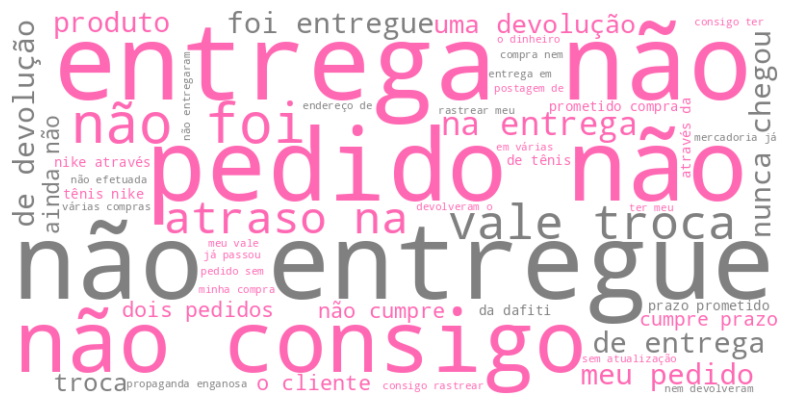

In [38]:
#Núvem de palavras
df = dafitiavaliadas_url

text = ' '.join(df[ "Titulo da reclamação"])

cor_palavras = ['#808080', '#FF69B4']
cor_fundo = 'white'

def color_func(word, font_size, position, orientation, random_state, **kwargs):
  return random.choice(cor_palavras)

max_palavras = 50

wordcloud = WordCloud(width=800, height=400, max_words=max_palavras, background_color=cor_fundo, colormap='pink', color_func=color_func ).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [40]:
#Categorização das reclamações

palavras_chave = {
    'troca': ['não troca', 'trocar', 'vale troca'],
    'devolução.': ['errado', 'devolver', 'devolução', 'reembolso', 'estorno', 'entregaram'],
    'entrega': ['atraso', 'entrega', 'entregue',  'entregas', 'rastreio', 'código', 'rastrear'],
    'venda.': [ 'pagamento', 'cupom'],
}

def verificar_reclamacao(frase, palavras):
  for palavra in palavras:
    if palavra in frase.lower():
      return 1
    return 0

for coluna, palavras in palavras_chave.items():
  df[f'count_{coluna}'] = df['Titulo da reclamação'].apply(verificar_reclamacao, palavras=palavras)

print(df)

                                  Titulo da reclamação     Status  \
0    ainda  não fizeram o estorno do valor por cupo...  Resolvido   
1                                 produto não entregue  Resolvido   
2                                  troca de um produto  Resolvido   
3                           não consigo acessar o site  Resolvido   
4                                 compra decepcionante  Resolvido   
..                                                 ...        ...   
495  não me dão o estorno e o site sempre da erro q...  Resolvido   
496               devolvam meu produto ou meu dinheiro  Resolvido   
497                               estorno não recebido  Resolvido   
498                                   entrega atrasada  Resolvido   
499                           dafitti - entrega errada  Resolvido   

     count_troca  count_devolução.  count_entrega  count_venda.  
0              0                 0              0             0  
1              0                 0     

####Analise

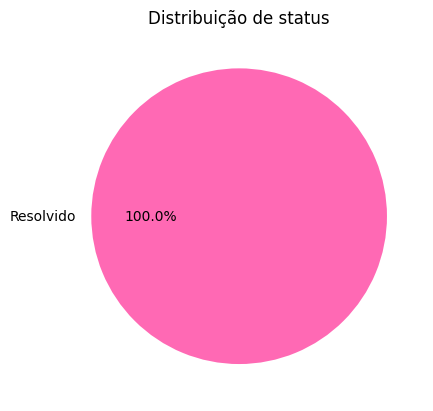

In [41]:
#Distribuição de status

contagem=pd.Series(status_totais).value_counts()
contagem.plot.pie(autopct='%1.1f%%', colors=['#FF69B4', '#808080'])
plt.title ('Distribuição de status')
plt.show()

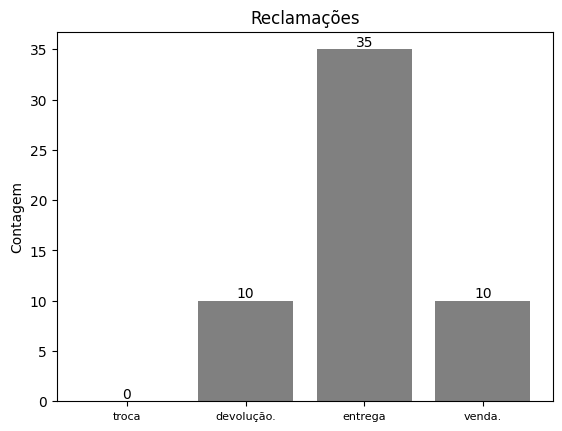

In [45]:
#Categorias

colunas = list(palavras_chave.keys())
contagem = [df[f'count_{coluna}'].sum() for coluna in colunas]

titulo = 'Reclamações'
cor_barras = '#808080'

plt.bar(colunas, contagem, color=cor_barras)

for i, v in enumerate(contagem):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.ylabel('Contagem')
plt.title(titulo)

plt.xticks(fontsize=8)

plt.show()

##Respondidas

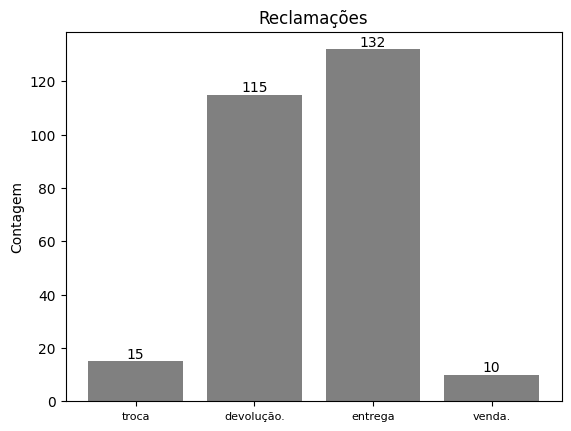

In [32]:
#Gráfico com motivo das reclamações
colunas = list(palavras_chave.keys())
contagem = [df[f'count_{coluna}'].sum() for coluna in colunas]

titulo = 'Reclamações'
cor_barras = '#808080'

plt.bar(colunas, contagem, color=cor_barras)

for i, v in enumerate(contagem):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.ylabel('Contagem')
plt.title(titulo)

plt.xticks(fontsize= 8)

plt.show()


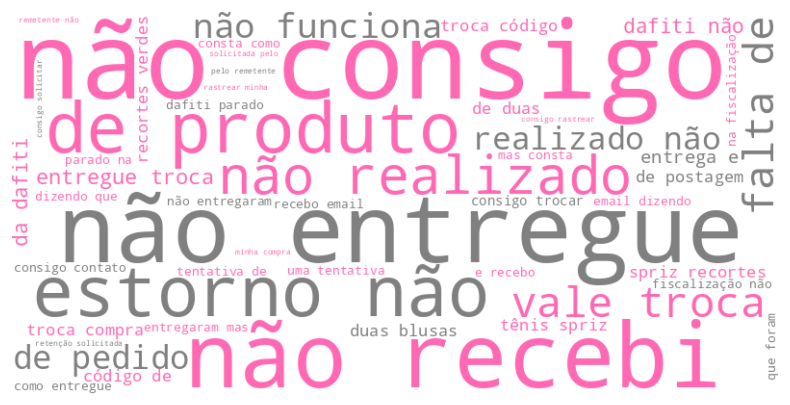

In [31]:
### nuvem de palavras
df = dafitirespondidas_url

text = ' '.join(df[ "Titulo da reclamação"])

cor_palavras = ['#808080', '#FF69B4']
cor_fundo = 'white'

def color_func(word, font_size, position, orientation, random_state, **kwargs):
  return random.choice(cor_palavras)

max_palavras = 50

wordcloud = WordCloud(width=800, height=400, max_words=max_palavras, background_color=cor_fundo, colormap='pink', color_func=color_func ).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

####Arquivos

In [23]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3',
    'Referer': 'http://www.example.com',
    'Accept-Language': 'en-US,en;q=0.9',
}

dafitirespondidas_url = 'https://www.reclameaqui.com.br/empresa/dafiti/lista-reclamacoes/?pagina={}&status=ANSWERED'


#### Raspagem

In [24]:
# Título da Reclamação

max_pages = 126 ## Todas as reclamações

titulos_totais = []

for page_num in range(1, max_pages+1):
    url = dafitirespondidas_url.format(page_num)
    page = requests.get(url, headers=headers)
    if page.status_code == 200:
        bs = BeautifulSoup(page.text, 'html.parser')
        titulo = bs.find_all('h4', attrs={"class": "sc-1pe7b5t-1 jAlTVn"})
        titulo = [t.get_text() for t in titulo]
        titulos_totais.extend(titulo)
        print(f"Página {page_num}: Reclamações - {titulo}")
    else:
        print(f"Falha ao acessar a página {page_num}")

# Imprimir todos os títulos coletados
print(f"Todos os títulos: {titulos_totais}")


Página 1: Reclamações - ['Compra pelo aplicativo', 'jaqueta da ellus deu defieito usada 5 vezes apenas', 'Não recebi o produto e não tem previsão.', 'Devolução pendente', 'Sandália quebrou', 'Entrega pela metade.', 'Não consigo editar o meu e-mail no site da Dafiti', 'Não consigo devolver', 'Dafiti cancelou meu pedido sem minha autorização', 'Uma tentativa de entrega e recebo email dizendo que foram 3!']
Página 2: Reclamações - ['jaqueta da ellus deu defieito usada 5 vezes apenas', 'Não recebi o produto e não tem previsão.', 'Devolução pendente', 'Sandália quebrou', 'Entrega pela metade.', 'Não consigo editar o meu e-mail no site da Dafiti', 'Não consigo devolver', 'Dafiti cancelou meu pedido sem minha autorização', 'Uma tentativa de entrega e recebo email dizendo que foram 3!', 'Pedido Dafiti parado na fiscalização']
Página 3: Reclamações - ['Não recebi o produto e não tem previsão.', 'Devolução pendente', 'Sandália quebrou', 'Entrega pela metade.', 'Não consigo editar o meu e-mail no

In [25]:
#Status da reclamação

max_pages = 126 ## Totas das reclamações

status_totais = []

for page_num in range(1, max_pages+1):
    url = dafitirespondidas_url.format(page_num)
    page = requests.get(url, headers=headers)
    if page.status_code == 200:
        bs = BeautifulSoup(page.text, 'html.parser')
        status = bs.find_all("span", attrs={"class": ["sc-1pe7b5t-4 bfIEOo", "sc-1pe7b5t-4 cdFULn", "sc-1pe7b5t-4 bfzjDQ", "sc-1pe7b5t-4 hZqQyt", "sc-1a60wwz-1 jlVOpm"] })
        status = [t.get_text() for t in status]
        status_totais.extend(status)
        print(f"Página {page_num}: status - {status}")
    else:
        print(f"Falha ao acessar a página {page_num}")

# Imprimir todas os status coletadas
print(f"Todos os status: {status_totais}")

Página 1: status - ['Respondida', 'Respondida', 'Respondida', 'Respondida', 'Respondida', 'Respondida', 'Respondida', 'Respondida', 'Respondida', 'Respondida']
Página 2: status - ['Respondida', 'Respondida', 'Respondida', 'Respondida', 'Respondida', 'Respondida', 'Respondida', 'Respondida', 'Respondida', 'Respondida']
Página 3: status - ['Respondida', 'Respondida', 'Respondida', 'Respondida', 'Respondida', 'Respondida', 'Respondida', 'Respondida', 'Respondida', 'Respondida']
Página 4: status - ['Respondida', 'Respondida', 'Respondida', 'Respondida', 'Respondida', 'Respondida', 'Respondida', 'Respondida', 'Respondida', 'Respondida']
Página 5: status - ['Respondida', 'Respondida', 'Respondida', 'Respondida', 'Respondida', 'Respondida', 'Respondida', 'Respondida', 'Respondida', 'Respondida']
Página 6: status - ['Respondida', 'Respondida', 'Respondida', 'Respondida', 'Respondida', 'Respondida', 'Respondida', 'Respondida', 'Respondida', 'Respondida']
Página 7: status - ['Respondida', 'Respo

#### Tratamento

In [26]:
#Total de dados coletados
print(len(titulos_totais))
print(len(status_totais))


500
500


In [27]:
#Criação de tabela

dafitirespondidas_url = pd.DataFrame({
    "Titulo da reclamação": titulos_totais,
    "Status": status_totais
})

dafitirespondidas_url["Titulo da reclamação"] = dafitirespondidas_url ["Titulo da reclamação"].str.lower()

print(dafitirespondidas_url)

                                  Titulo da reclamação      Status
0                               compra pelo aplicativo  Respondida
1    jaqueta da ellus deu defieito usada 5 vezes ap...  Respondida
2             não recebi o produto e não tem previsão.  Respondida
3                                   devolução pendente  Respondida
4                                     sandália quebrou  Respondida
..                                                 ...         ...
495                            comprei mais não recebi  Respondida
496  impossivel trocar o endereço da entrega e no s...  Respondida
497          solicitação de troca e email sem resposta  Respondida
498                              produto não entregue.  Respondida
499                            não entregou mercadoria  Respondida

[500 rows x 2 columns]


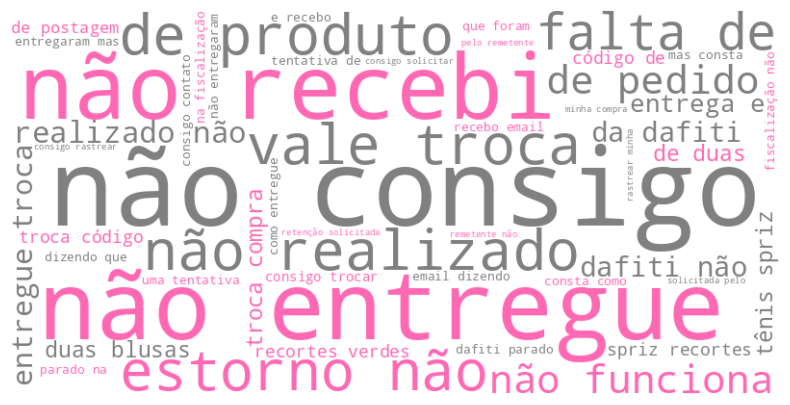

In [28]:
#Núvem de palavras
df = dafitirespondidas_url

text = ' '.join(df[ "Titulo da reclamação"])

cor_palavras = ['#808080', '#FF69B4']
cor_fundo = 'white'

def color_func(word, font_size, position, orientation, random_state, **kwargs):
  return random.choice(cor_palavras)

max_palavras = 50

wordcloud = WordCloud(width=800, height=400, max_words=max_palavras, background_color=cor_fundo, colormap='pink', color_func=color_func ).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [29]:
# Dicionário de palavras-chave
palavras_chave = {
    'troca': ['não troca', 'trocar'],
    'devolução.': ['errado', 'devolver', 'devolução', 'reembolso', 'estorno', 'entregaram'],
    'entrega': ['atraso', 'entrega', 'entregue',  'entregas', 'rastreio', 'código', 'rastrear'],
    'venda.': [ 'pagamento', 'cupom'],
}

def verificar_reclamacao(frase, palavras):
    for palavra in palavras:
        if palavra in frase.lower():
            return 1
    return 0

for coluna, palavras in palavras_chave.items():
    df[f'count_{coluna}'] = df['Titulo da reclamação'].apply(verificar_reclamacao, palavras=palavras)

print(df)

                                  Titulo da reclamação      Status  \
0                               compra pelo aplicativo  Respondida   
1    jaqueta da ellus deu defieito usada 5 vezes ap...  Respondida   
2             não recebi o produto e não tem previsão.  Respondida   
3                                   devolução pendente  Respondida   
4                                     sandália quebrou  Respondida   
..                                                 ...         ...   
495                            comprei mais não recebi  Respondida   
496  impossivel trocar o endereço da entrega e no s...  Respondida   
497          solicitação de troca e email sem resposta  Respondida   
498                              produto não entregue.  Respondida   
499                            não entregou mercadoria  Respondida   

     count_troca  count_devolução.  count_entrega  count_venda.  
0              0                 0              0             0  
1              0           

####Analises

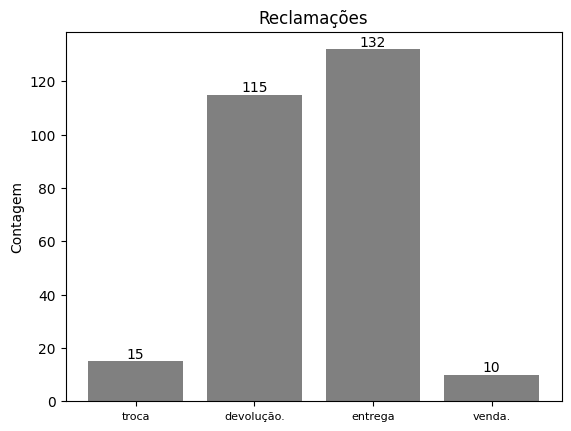

In [30]:
#Categorias

colunas = list(palavras_chave.keys())
contagem = [df[f'count_{coluna}'].sum() for coluna in colunas]

titulo = 'Reclamações'
cor_barras = '#808080'

plt.bar(colunas, contagem, color=cor_barras)

for i, v in enumerate(contagem):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.ylabel('Contagem')
plt.title(titulo)

plt.xticks(fontsize= 8)

plt.show()

##Não Respondidas

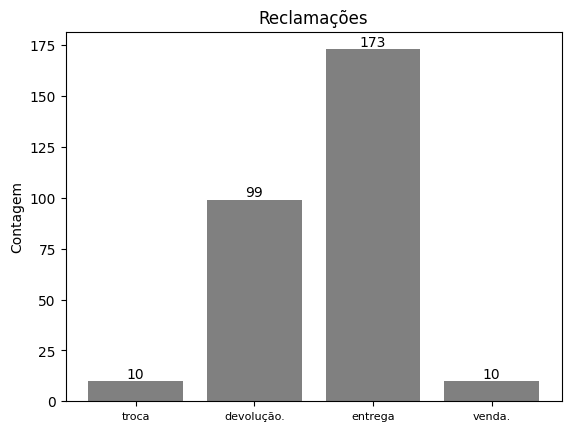

In [21]:
#Gráfico com motivo das reclamações
colunas = list(palavras_chave.keys())
contagem = [df[f'count_{coluna}'].sum() for coluna in colunas]

titulo = 'Reclamações'
cor_barras = '#808080'

plt.bar(colunas, contagem, color=cor_barras)

for i, v in enumerate(contagem):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.ylabel('Contagem')
plt.title(titulo)

plt.xticks(fontsize=8)

plt.show()

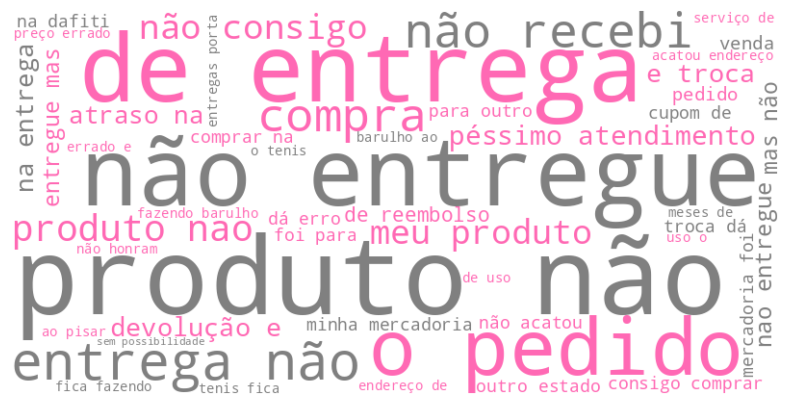

In [20]:
### Núvem de palavras:

df = dafitinaorespondidas_url

text = ' '.join(df[ "Titulo da reclamação"])

cor_palavras = ['#808080', '#FF69B4']
cor_fundo = 'white'

def color_func(word, font_size, position, orientation, random_state, **kwargs):
  return random.choice(cor_palavras)

max_palavras = 50

wordcloud = WordCloud(width=800, height=400, max_words=max_palavras, background_color=cor_fundo, colormap='pink', color_func=color_func ).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Arquivos

####Raspagem

In [11]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3',
    'Referer': 'http://www.example.com',
    'Accept-Language': 'en-US,en;q=0.9',
}

dafitinaorespondidas_url = 'https://www.reclameaqui.com.br/empresa/dafiti/lista-reclamacoes/?pagina={}&status=NOT_ANSWERED'


In [12]:
#Titulo da reclamação

max_pages = 50 ## Todas as reclamações

titulos_totais = []

for page_num in range(1, max_pages+1):
    url = dafitinaorespondidas_url.format(page_num)
    page = requests.get(url, headers=headers)
    if page.status_code == 200:
        bs = BeautifulSoup(page.text, 'html.parser')
        titulo = bs.find_all('h4', attrs={"class": "sc-1pe7b5t-1 jAlTVn"})
        titulo = [t.get_text() for t in titulo]
        titulos_totais.extend(titulo)
        print(f"Página {page_num}: Reclamações - {titulo}")
    else:
        print(f"Falha ao acessar a página {page_num}")

# Imprimir todos os títulos coletados
print(f"Todos os títulos: {titulos_totais}")

Página 1: Reclamações - ['Não houve entrega', 'VALOR DE REEMBOLSO NÃO CREDITADO', 'erram na primeira entrega e agora eu tenho que pagar o novo frete', 'STATUS ENTREGUE MAS NÃO RECEBI NADA!', 'Produto nao entregue', 'Demora no retorno das devoluções', 'Produto NAO FOI ENTREGUE', 'Atraso na entrega', 'O código de postagem não é válido.', 'Não consigo comprar na dafiti']
Página 2: Reclamações - ['VALOR DE REEMBOLSO NÃO CREDITADO', 'erram na primeira entrega e agora eu tenho que pagar o novo frete', 'STATUS ENTREGUE MAS NÃO RECEBI NADA!', 'Produto nao entregue', 'Demora no retorno das devoluções', 'Produto NAO FOI ENTREGUE', 'Atraso na entrega', 'O código de postagem não é válido.', 'Não consigo comprar na dafiti', 'compra']
Página 3: Reclamações - ['erram na primeira entrega e agora eu tenho que pagar o novo frete', 'STATUS ENTREGUE MAS NÃO RECEBI NADA!', 'Produto nao entregue', 'Demora no retorno das devoluções', 'Produto NAO FOI ENTREGUE', 'Atraso na entrega', 'O código de postagem não 

In [13]:
## Status da reclamação:

max_pages = 50 ## Todas as reclamações

status_totais = []

for page_num in range(1, max_pages+1):
    url = dafitinaorespondidas_url.format(page_num)
    page = requests.get(url, headers=headers)
    if page.status_code == 200:
        bs = BeautifulSoup(page.text, 'html.parser')
        status = bs.find_all("span", attrs={"class": ["sc-1pe7b5t-4 bfIEOo", "sc-1pe7b5t-4 cdFULn", "sc-1pe7b5t-4 bfzjDQ", "sc-1pe7b5t-4 hZqQyt", "sc-1a60wwz-1 jlVOpm"] })
        status = [t.get_text() for t in status]
        status_totais.extend(status)
        print(f"Página {page_num}: status - {status}")
    else:
        print(f"Falha ao acessar a página {page_num}")

# Imprimir todas os status coletadas
print(f"Todos os status: {status_totais}")

Página 1: status - ['Não respondida', 'Não respondida', 'Não respondida', 'Não respondida', 'Não respondida', 'Não respondida', 'Não respondida', 'Não respondida', 'Não respondida', 'Não respondida']
Página 2: status - ['Não respondida', 'Não respondida', 'Não respondida', 'Não respondida', 'Não respondida', 'Não respondida', 'Não respondida', 'Não respondida', 'Não respondida', 'Não respondida']
Página 3: status - ['Não respondida', 'Não respondida', 'Não respondida', 'Não respondida', 'Não respondida', 'Não respondida', 'Não respondida', 'Não respondida', 'Não respondida', 'Não respondida']
Página 4: status - ['Não respondida', 'Não respondida', 'Não respondida', 'Não respondida', 'Não respondida', 'Não respondida', 'Não respondida', 'Não respondida', 'Não respondida', 'Não respondida']
Página 5: status - ['Não respondida', 'Não respondida', 'Não respondida', 'Não respondida', 'Não respondida', 'Não respondida', 'Não respondida', 'Não respondida', 'Não respondida', 'Não respondida']


#### Tratamento

In [14]:
print(len(titulos_totais))
print(len(status_totais))

500
500


In [15]:
dafitinaorespondidas_url = pd.DataFrame({
    "Titulo da reclamação": titulos_totais,
    "Status": status_totais
})

dafitinaorespondidas_url["Titulo da reclamação"] = dafitinaorespondidas_url["Titulo da reclamação"].str.lower()


print(dafitinaorespondidas_url)

                                  Titulo da reclamação          Status
0                                    não houve entrega  Não respondida
1                     valor de reembolso não creditado  Não respondida
2    erram na primeira entrega e agora eu tenho que...  Não respondida
3                 status entregue mas não recebi nada!  Não respondida
4                                 produto nao entregue  Não respondida
..                                                 ...             ...
495                                            entrega  Não respondida
496                            cancelamento de compras  Não respondida
497                    propaganda de promoção enganosa  Não respondida
498                                    produto trocado  Não respondida
499                                   coleta incorreta  Não respondida

[500 rows x 2 columns]


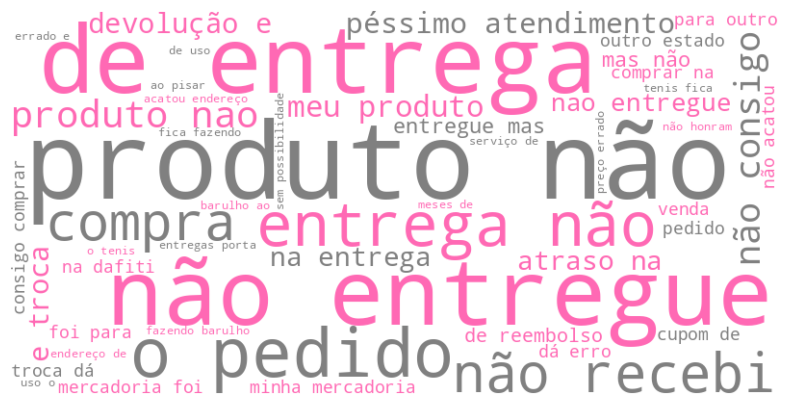

In [16]:
#Núvem de palavras
df = dafitinaorespondidas_url

text = ' '.join(df[ "Titulo da reclamação"])

cor_palavras = ['#808080', '#FF69B4']
cor_fundo = 'white'

def color_func(word, font_size, position, orientation, random_state, **kwargs):
  return random.choice(cor_palavras)

max_palavras = 50

wordcloud = WordCloud(width=800, height=400, max_words=max_palavras, background_color=cor_fundo, colormap='pink', color_func=color_func ).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
#Categorização das reclamações
palavras_chave = {
    'troca': ['não troca', 'trocar'],
    'devolução.': ['errado', 'devolver', 'devolução', 'reembolso'],
    'entrega': ['atraso', 'entrega', 'entregue',  'entregas'],
    'venda.': [ 'pagamento', 'cupom'],
}

def verificar_reclamacao(frase, palavras):
    for palavra in palavras:
        if palavra in frase.lower():
            return 1
    return 0

for coluna, palavras in palavras_chave.items():
    df[f'count_{coluna}'] = df['Titulo da reclamação'].apply(verificar_reclamacao, palavras=palavras)

# Exibir o DataFrame resultante
print(df)

                                  Titulo da reclamação          Status  \
0                                    não houve entrega  Não respondida   
1                     valor de reembolso não creditado  Não respondida   
2    erram na primeira entrega e agora eu tenho que...  Não respondida   
3                 status entregue mas não recebi nada!  Não respondida   
4                                 produto nao entregue  Não respondida   
..                                                 ...             ...   
495                                            entrega  Não respondida   
496                            cancelamento de compras  Não respondida   
497                    propaganda de promoção enganosa  Não respondida   
498                                    produto trocado  Não respondida   
499                                   coleta incorreta  Não respondida   

     count_troca  count_devolução.  count_entrega  count_venda.  
0              0                 0           

#### Analises

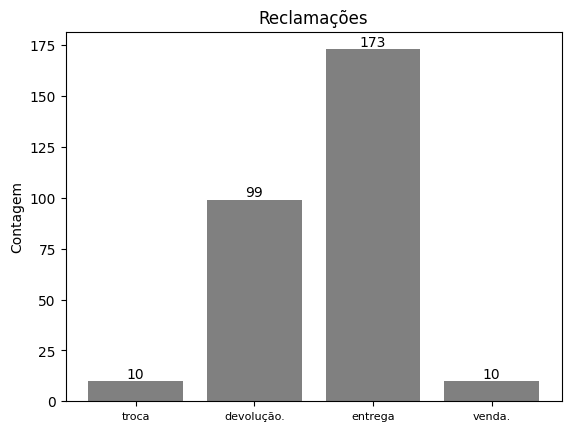

In [18]:
colunas = list(palavras_chave.keys())
contagem = [df[f'count_{coluna}'].sum() for coluna in colunas]

titulo = 'Reclamações'
cor_barras = '#808080'

plt.bar(colunas, contagem, color=cor_barras)

for i, v in enumerate(contagem):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.ylabel('Contagem')
plt.title(titulo)

plt.xticks(fontsize= 8)

plt.show()